In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [4]:
df_min=df[df['7']==0]

In [5]:
df_min.to_csv('ecoli_0_vs_1_minority_train.csv',index=False)
df_min=pd.read_csv('ecoli_0_vs_1_minority_train.csv')

In [6]:
df_majority=df[df['7']==1]
df_majority.to_csv('ecoli_0_vs_1_majority_train.csv',index=False)
df_majority=pd.read_csv('ecoli_0_vs_1_majority_train.csv')

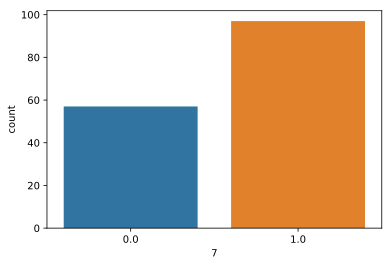

In [7]:
%matplotlib inline
sns.countplot(x='7',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(51, 5, 8)
(51, 8)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(8))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2320      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 168       
Total params: 2,488
Trainable params: 2,488
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
30/30 [==============================] - 3s 92ms/step - loss: 0.2768
Epoch 2/500
30/30 [==============================] - 0s 501us/step - loss: 0.2702
Epoch 3/500
30/30 [==============================] - 0s 568us/step - loss: 0.2628
Epoch 4/500
30/30 [==============================] - 0s 669us/step - loss: 0.2552
Epoch 5/500
30/30 [==============================] - 0s 703us/step - loss: 0.2475
Epoch 6/500
30/30 [==============================] - 0s 802us/step - loss: 0.2400
Epoch 7/500
30/30 [==============================] - 0s 735us/step - loss: 0.2325
Epoch 8/500
30/30 [==============================] - 0s 702us/step - loss: 0.2252
Epoch 9/500
30/30 [==============================] - 0s 701us/step - loss: 0.2181
Epoch 10/500
30/30 [==============================] - 0s 635us/step - loss: 0.2111
Epoch 11/500
30/30 [==============================] - 0s 735us/step - loss: 0.2043
Epoch 12/500
30/30 [==============================] - 0s 702us/step - loss: 0.1977
Epoch 13/500
3

Epoch 100/500
30/30 [==============================] - 0s 719us/step - loss: 0.0267
Epoch 101/500
30/30 [==============================] - 0s 618us/step - loss: 0.0267
Epoch 102/500
30/30 [==============================] - 0s 652us/step - loss: 0.0267
Epoch 103/500
30/30 [==============================] - 0s 702us/step - loss: 0.0267
Epoch 104/500
30/30 [==============================] - 0s 802us/step - loss: 0.0267
Epoch 105/500
30/30 [==============================] - 0s 652us/step - loss: 0.0267
Epoch 106/500
30/30 [==============================] - 0s 601us/step - loss: 0.0266
Epoch 107/500
30/30 [==============================] - 0s 719us/step - loss: 0.0266
Epoch 108/500
30/30 [==============================] - 0s 729us/step - loss: 0.0266
Epoch 109/500
30/30 [==============================] - 0s 668us/step - loss: 0.0266
Epoch 110/500
30/30 [==============================] - 0s 769us/step - loss: 0.0266
Epoch 111/500
30/30 [==============================] - 0s 718us/step - loss:

Epoch 198/500
30/30 [==============================] - 0s 702us/step - loss: 0.0259
Epoch 199/500
30/30 [==============================] - 0s 869us/step - loss: 0.0259
Epoch 200/500
30/30 [==============================] - 0s 702us/step - loss: 0.0259
Epoch 201/500
30/30 [==============================] - 0s 835us/step - loss: 0.0259
Epoch 202/500
30/30 [==============================] - 0s 618us/step - loss: 0.0259
Epoch 203/500
30/30 [==============================] - 0s 702us/step - loss: 0.0259
Epoch 204/500
30/30 [==============================] - 0s 735us/step - loss: 0.0259
Epoch 205/500
30/30 [==============================] - 0s 865us/step - loss: 0.0259
Epoch 206/500
30/30 [==============================] - 0s 652us/step - loss: 0.0259
Epoch 207/500
30/30 [==============================] - 0s 685us/step - loss: 0.0259
Epoch 208/500
30/30 [==============================] - 0s 719us/step - loss: 0.0259
Epoch 209/500
30/30 [==============================] - 0s 1ms/step - loss: 0

Epoch 296/500
30/30 [==============================] - 0s 535us/step - loss: 0.0252
Epoch 297/500
30/30 [==============================] - 0s 735us/step - loss: 0.0251
Epoch 298/500
30/30 [==============================] - 0s 702us/step - loss: 0.0251
Epoch 299/500
30/30 [==============================] - 0s 802us/step - loss: 0.0251
Epoch 300/500
30/30 [==============================] - 0s 869us/step - loss: 0.0251
Epoch 301/500
30/30 [==============================] - 0s 702us/step - loss: 0.0251
Epoch 302/500
30/30 [==============================] - 0s 630us/step - loss: 0.0251
Epoch 303/500
30/30 [==============================] - 0s 852us/step - loss: 0.0251
Epoch 304/500
30/30 [==============================] - 0s 752us/step - loss: 0.0251
Epoch 305/500
30/30 [==============================] - 0s 769us/step - loss: 0.0251
Epoch 306/500
30/30 [==============================] - 0s 685us/step - loss: 0.0251
Epoch 307/500
30/30 [==============================] - 0s 752us/step - loss:

Epoch 394/500
30/30 [==============================] - 0s 635us/step - loss: 0.0242
Epoch 395/500
30/30 [==============================] - 0s 802us/step - loss: 0.0242
Epoch 396/500
30/30 [==============================] - 0s 635us/step - loss: 0.0242
Epoch 397/500
30/30 [==============================] - 0s 774us/step - loss: 0.0242
Epoch 398/500
30/30 [==============================] - 0s 719us/step - loss: 0.0242
Epoch 399/500
30/30 [==============================] - 0s 735us/step - loss: 0.0242
Epoch 400/500
30/30 [==============================] - 0s 635us/step - loss: 0.0242
Epoch 401/500
30/30 [==============================] - 0s 785us/step - loss: 0.0242
Epoch 402/500
30/30 [==============================] - 0s 668us/step - loss: 0.0242
Epoch 403/500
30/30 [==============================] - 0s 685us/step - loss: 0.0241
Epoch 404/500
30/30 [==============================] - 0s 836us/step - loss: 0.0241
Epoch 405/500
30/30 [==============================] - 0s 752us/step - loss:

Epoch 492/500
30/30 [==============================] - 0s 769us/step - loss: 0.0230
Epoch 493/500
30/30 [==============================] - 0s 799us/step - loss: 0.0230
Epoch 494/500
30/30 [==============================] - 0s 685us/step - loss: 0.0230
Epoch 495/500
30/30 [==============================] - 0s 685us/step - loss: 0.0230
Epoch 496/500
30/30 [==============================] - 0s 819us/step - loss: 0.0230
Epoch 497/500
30/30 [==============================] - 0s 953us/step - loss: 0.0230
Epoch 498/500
30/30 [==============================] - 0s 568us/step - loss: 0.0230
Epoch 499/500
30/30 [==============================] - 0s 635us/step - loss: 0.0229
Epoch 500/500
30/30 [==============================] - 0s 652us/step - loss: 0.0229


In [14]:
model.save('7-24-2019-ecoli_0_vs1.h5')

In [15]:
Xtrain.shape

(30, 5, 8)

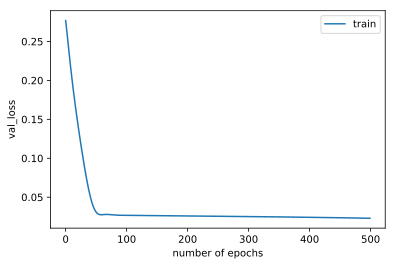

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

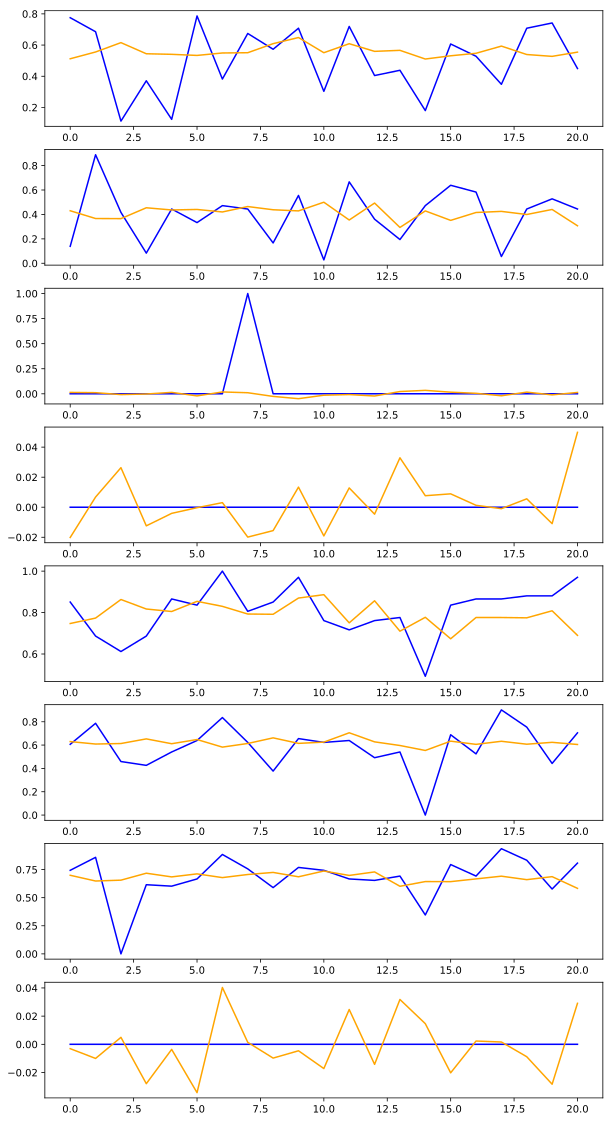

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 5.12049258e-01,  4.30312574e-01,  1.35013424e-02,
        -2.01452877e-02,  7.47200191e-01,  6.30115330e-01,
         6.99418485e-01, -3.08389217e-03],
       [ 5.55518687e-01,  3.66587162e-01,  1.10075288e-02,
         6.77191699e-03,  7.73406923e-01,  6.09013855e-01,
         6.48360312e-01, -1.00214928e-02],
       [ 6.15452647e-01,  3.65700245e-01, -8.25727358e-03,
         2.63272915e-02,  8.63032401e-01,  6.13425553e-01,
         6.55965447e-01,  4.93901223e-03],
       [ 5.44187248e-01,  4.54627454e-01, -2.41341069e-03,
        -1.23980995e-02,  8.17164481e-01,  6.53174341e-01,
         7.17824340e-01, -2.79281139e-02],
       [ 5.40514171e-01,  4.36689198e-01,  1.38616972e-02,
        -4.08609724e-03,  8.05130601e-01,  6.11766994e-01,
         6.85004830e-01, -3.61423194e-03],
       [ 5.33512712e-01,  4.40872669e-01, -2.12808587e-02,
        -3.12258955e-04,  8.54118168e-01,  6.47606194e-01,
         7.11899519e-01, -3.42859849e-02],
       [ 5.49154222e-01,  4.203096

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

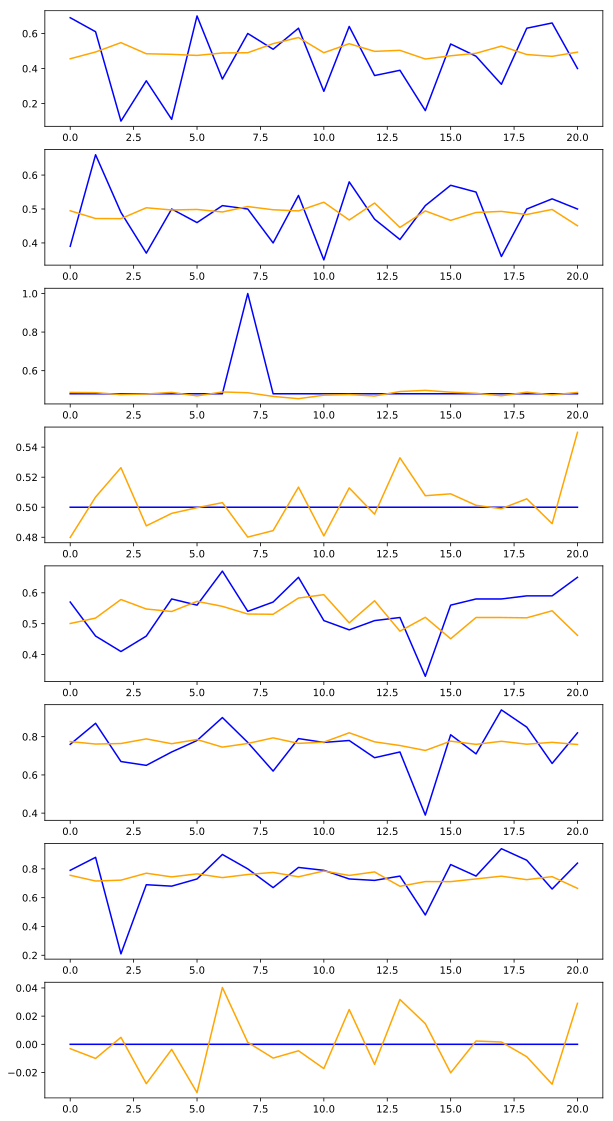

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 5.12049258e-01,  4.30312574e-01,  1.35013424e-02,
        -2.01452877e-02,  7.47200191e-01,  6.30115330e-01,
         6.99418485e-01, -3.08389217e-03],
       [ 5.55518687e-01,  3.66587162e-01,  1.10075288e-02,
         6.77191699e-03,  7.73406923e-01,  6.09013855e-01,
         6.48360312e-01, -1.00214928e-02],
       [ 6.15452647e-01,  3.65700245e-01, -8.25727358e-03,
         2.63272915e-02,  8.63032401e-01,  6.13425553e-01,
         6.55965447e-01,  4.93901223e-03],
       [ 5.44187248e-01,  4.54627454e-01, -2.41341069e-03,
        -1.23980995e-02,  8.17164481e-01,  6.53174341e-01,
         7.17824340e-01, -2.79281139e-02],
       [ 5.40514171e-01,  4.36689198e-01,  1.38616972e-02,
        -4.08609724e-03,  8.05130601e-01,  6.11766994e-01,
         6.85004830e-01, -3.61423194e-03],
       [ 5.33512712e-01,  4.40872669e-01, -2.12808587e-02,
        -3.12258955e-04,  8.54118168e-01,  6.47606194e-01,
         7.11899519e-01, -3.42859849e-02],
       [ 5.49154222e-01,  4.203096

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)